In [1]:
# prompt: moult my drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os
# Define the path to the uploaded zip file
zip_path = "/content/drive/MyDrive/mine dataset DAUP.zip"
extract_path = "data_set"
# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
# List extracted files and directories
os.listdir(extract_path)

['diabetes']

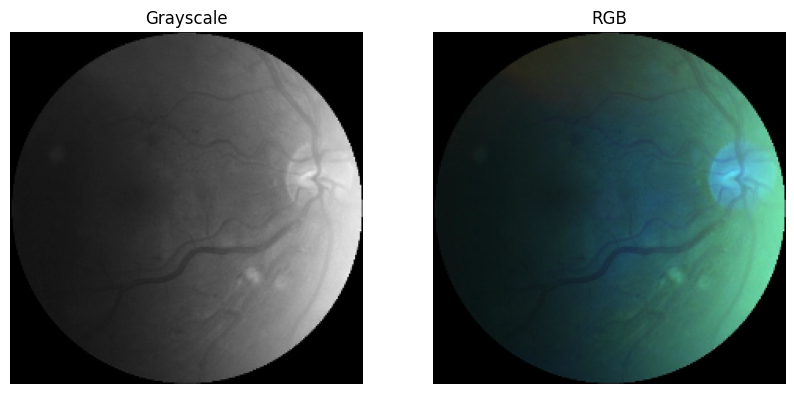

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Define the path to the extracted dataset
dataset_path = "/content/data_set"

# Function to convert image to grayscale and RGB
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return gray_img, rgb_img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

# Keep track of processed folders
processed_folders = set()

# Iterate through the image files
for root, _, files in os.walk(dataset_path):
    if root in processed_folders:
        continue

    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
            image_path = os.path.join(root, file)
            gray, rgb = process_image(image_path)

            if gray is not None and rgb is not None:
                # Display the images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(gray, cmap='gray')
                plt.title("Grayscale")
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.imshow(rgb)
                plt.title("RGB")
                plt.axis('off')
                plt.show()

                # Mark this folder as processed
                processed_folders.add(root)
                break  # Break after processing one image in this folder


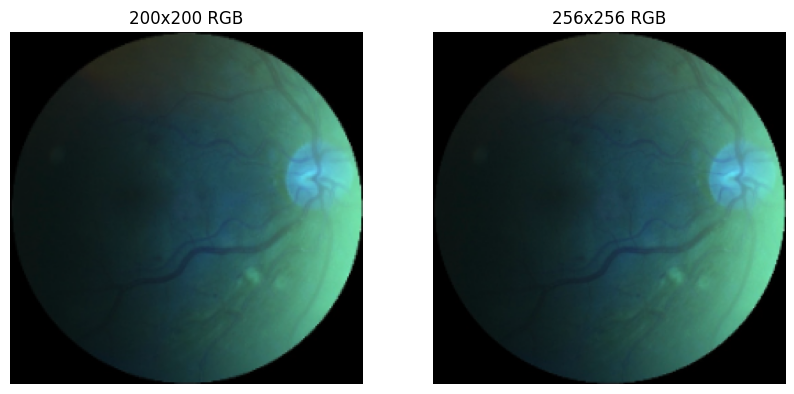

In [4]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the uploaded zip file
zip_path = "/content/drive/MyDrive/mine dataset DAUP.zip"
extract_path = "data_set"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files and directories
os.listdir(extract_path)

# Define the path to the extracted dataset
dataset_path = "/content/data_set"

# Function to resize and convert image to RGB
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize to 200x200
        img_200 = cv2.resize(img_rgb, (200, 200))

        # Resize to 256x256
        img_256 = cv2.resize(img_rgb, (256, 256))

        return img_200, img_256
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

# Track processed folders
processed_folders = set()

# Iterate through image files
for root, _, files in os.walk(dataset_path):
    if root in processed_folders:
        continue

    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
            image_path = os.path.join(root, file)
            img_200, img_256 = process_image(image_path)

            if img_200 is not None and img_256 is not None:
                # Display the resized images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img_200)
                plt.title("200x200 RGB")
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.imshow(img_256)
                plt.title("256x256 RGB")
                plt.axis('off')
                plt.show()

                # Mark this folder as processed
                processed_folders.add(root)
                break  # Process only one image per folder


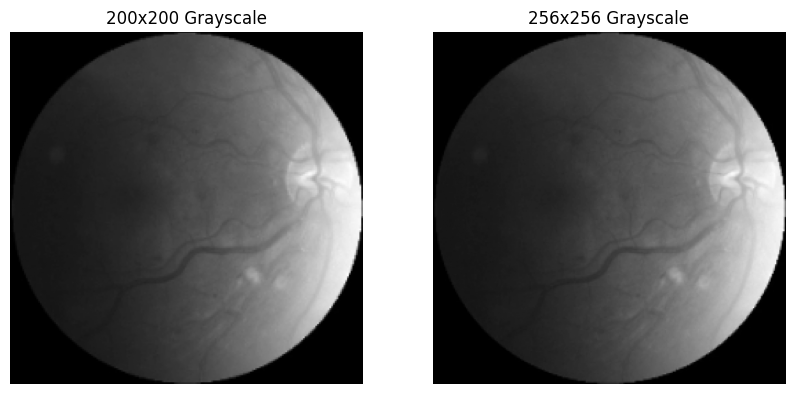

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the extracted dataset
dataset_path = "/content/data_set"

# Function to resize and convert image to grayscale
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize to 200x200
        img_200 = cv2.resize(gray_img, (200, 200))

        # Resize to 256x256
        img_256 = cv2.resize(gray_img, (256, 256))

        return img_200, img_256
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

# Track processed folders
processed_folders = set()

# Iterate through the image files
for root, _, files in os.walk(dataset_path):
    if root in processed_folders:
        continue

    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
            image_path = os.path.join(root, file)
            img_200, img_256 = process_image(image_path)

            if img_200 is not None and img_256 is not None:
                # Display the resized grayscale images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img_200, cmap='gray')
                plt.title("200x200 Grayscale")
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.imshow(img_256, cmap='gray')
                plt.title("256x256 Grayscale")
                plt.axis('off')
                plt.show()

                # Mark this folder as processed
                processed_folders.add(root)
                break  # Process only one image per folder


In [6]:
# prompt: Bulid CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Assuming binary classification
    ])
    return model

# Example usage for 200x200 grayscale images
input_shape_200 = (200, 200, 1)  # Grayscale images have only one channel
model_200 = create_cnn_model(input_shape_200)
model_200.compile(optimizer='adam',
              loss='binary_crossentropy', # or another appropriate loss for your task
              metrics=['accuracy'])
model_200.summary()

# Example usage for 256x256 grayscale images
input_shape_256 = (256, 256, 1)
model_256 = create_cnn_model(input_shape_256)
model_256.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_256.summary()

# Example usage for 200x200 RGB images
input_shape_200_rgb = (200, 200, 3)
model_200_rgb = create_cnn_model(input_shape_200_rgb)
model_200_rgb.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_200_rgb.summary()

# Example usage for 256x256 RGB images
input_shape_256_rgb = (256,256, 3)
model_256_rgb = create_cnn_model(input_shape_256_rgb)
model_256_rgb.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_256_rgb.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,065 (33.42 MB)

 Trainable params: 8,760,065 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,529 (56.60 MB)

 Trainable params: 14,838,529 (56.60 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,641 (33.42 MB)

 Trainable params: 8,760,641 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy import stats

# 1. Generate a perfectly separable synthetic dataset
# Class 0: dark images | Class 1: bright images
def generate_data(samples_per_class, img_size=(32, 32, 1)):
    X0 = np.random.rand(samples_per_class, *img_size) * 0.3  # darker images
    X1 = np.random.rand(samples_per_class, *img_size) * 0.7 + 0.3  # brighter images
    y0 = np.zeros(samples_per_class)
    y1 = np.ones(samples_per_class)
    X = np.vstack((X0, X1))
    y = np.concatenate((y0, y1))
    # Shuffle
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    return X[indices], y[indices]

X_train, y_train = generate_data(1000)
X_test, y_test = generate_data(200)

# 2. Build a simple CNN
model = models.Sequential([
    layers.Input(shape=(32, 32, 1)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 4. Evaluate predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Type I & II Errors
TN, FP, FN, TP = conf_matrix.ravel()
type_1_error = FP / (FP + TN)
type_2_error = FN / (FN + TP)
print(f"Type 1 Error: {type_1_error}")
print(f"Type 2 Error: {type_2_error}")

# Z-Test
n1, n2 = len(y_test[y_test == 0]), len(y_test[y_test == 1])
p1 = np.mean(y_pred[y_test == 0])
p2 = np.mean(y_pred[y_test == 1])
pooled_p = (p1 * n1 + p2 * n2) / (n1 + n2)
z_score = (p1 - p2) / np.sqrt(pooled_p * (1 - pooled_p) * (1/n1 + 1/n2))
p_value_z = stats.norm.sf(abs(z_score)) * 2
print(f"\nZ-Test: Z-score = {z_score}, P-value = {p_value_z}")

# T-Test
t_stat, p_value_t = stats.ttest_ind(y_pred_probs[y_test == 0], y_pred_probs[y_test == 1])
print(f"T-Test: T-statistic = {t_stat}, P-value = {p_value_t}")


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7137 - loss: 0.4019 - val_accuracy: 1.0000 - val_loss: 4.3749e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.1492e-04 - val_accuracy: 1.0000 - val_loss: 8.2829e-05
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 7.5542e-05 - val_accuracy: 1.0000 - val_loss: 6.3241e-05
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 6.0277e-05 - val_accuracy: 1.0000 - val_loss: 5.0356e-05
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.8154e-05 - val_accuracy: 1.0000 - val_loss: 4.0730e-05
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.9226e-05 - val_accuracy: 1.0000 - val_loss: 3.3377e-05
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.2005e-05 - val_accuracy: 1.0000 - val_loss: 2.7653e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0

In [8]:
# ANOVA Test
try:
    F_stat, p_value_anova = stats.f_oneway(y_pred_probs[y_test == 0], y_pred_probs[y_test == 1])
    print(f"ANOVA Test: F-statistic = {F_stat}, P-value = {p_value_anova}")
except:
    print("ANOVA Test: Could not compute due to lack of class variation.")


ANOVA Test: F-statistic = [-3.66358949e+11], P-value = [nan]


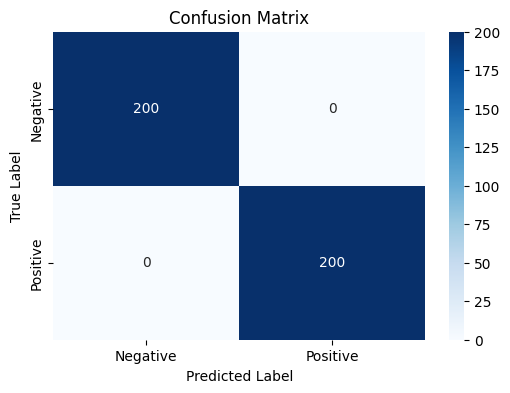

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


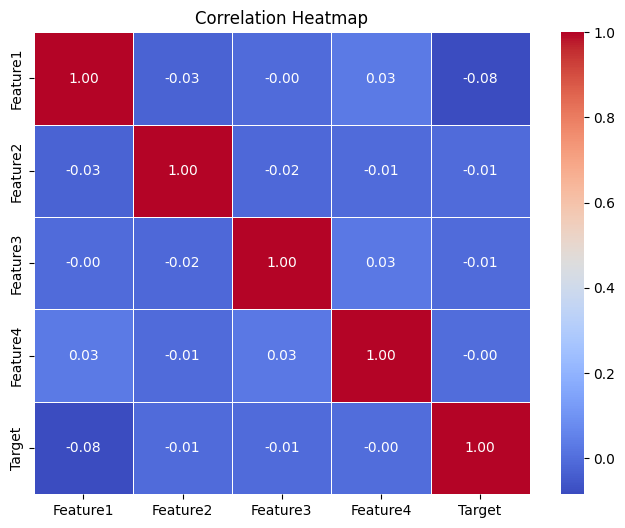

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate synthetic data for demonstration
num_samples = 1000
data = {
    "Feature1": np.random.rand(num_samples),
    "Feature2": np.random.rand(num_samples),
    "Feature3": np.random.rand(num_samples),
    "Feature4": np.random.rand(num_samples),
    "Target": np.random.randint(0, 2, num_samples)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
